# Homework-2
* CSCI-4931 : Deep Learning
* Fall 2025
* Instructor: Ashis Kumer Biswas



* Please assign your name, and declare collaborators (if any) to the variables below:

In [ ]:
my_name = " Shivam Pathak"
collaborators = " None "

## Little Background about the problem

`Customer churn`` occurs when customers stop doing business with a company, also known as customer attrition. It is also referred to as loss of clients or customers.

You are given sensitive information of 9,000 of an European Bank, EBQ. Your task is to build an Artificial Neural Network (ANN) based on the dataset such that later the ANN model can predict correctly who is going to leave next. This predictive analysis is vital for the EBQ bank to revise their business strategy towards customer retention. What do you think?

Anyway, you are recruited by the bank to do the data science. And, the head of the bank only trusts heads, i.e., brains…. I mean neural networks for making any decisions. And luckily you were in Dr. B’s class and you know something(?) about the ANN that you could successfully convince the head of the bank during the interview. He has put a lot of faith in you. Now, can you solve his problem?

Tasks:

1. Please download the zip file, `hw2-deliverables.zip``. Unzip it in your workspace. Here below is the file hierarchy of "hw2-deliverables/" folder:

```
hw2-deliverables
├── 2025-Fall-DL-hw2.ipynb
├── dataset
│   └── datasetX.csv
├── figures
│   ├── le.png
│   ├── nn-1.png
│   ├── nn-1.svg
│   ├── nn-2.png
│   ├── nn-2.svg
│   ├── nn-3.png
│   ├── nn-3.svg
│   └── ohe.png
└── saved_models
```
As you can see you will mostly be working with the `2025-Fall-DL-hw2.ipynb`, i.e., the jupyter notebook. The notebook accesses the dataset files: `dataset/datasetX.csv` containing few customer information and is labeled (i.e., the target column, `Exited` is present). Here below is a brief summary of the features you will find in the datasets:

* `CustomerId`: a unique identifier for each customer within the dataset. These values are not ordered sequentially within the dataset, and are only used to identify a specific customer. It typically does not have any influence to whether a customer leaves the business.
* `Surname`: A string used to identify the customer in the dataset. Surname may be distinct amidst all or most customers. Because of this, it most likely won't affect the target variable. 
* `CreditScore`: a numeric representation of the customer's individual fiscal credit score. Typically used to indicate eligibility for loans. Current credit scores use a range from 300 to 850, but the FICO auto score range uses 250-900. This feature likely determines retention rate of customers. 
* `Geography`: this feature contains a categorical string representing the name of a country the customer is from originally. 
* `Gender`: this feature contains a categorical string representing the gender of the customer ("Male"/"Female"). 
* `Age`: a numerical integer representation of a customer's age. Intuition suggests that older customers are likely to have higher retention than younger customers.
* `Tenure`: a numerical integer representation. It is assumed that this feature represents the number of total years the customer has been retained. It is likely that customers which have been retained longer will continue to be retained.
* `Balance`: a numerical floating point number (to two decimal places of precision) indicating the customer's current bank balance (assumed total across all accounts). Customers with a greater balance may be less likely to exit the account due to difficulty of transfer. 
* `NumOfProducts`: numeric integer value. It is assumed that this value represents the number of accounts (products) that this customer has open. Further evaluation of this feature would be needed to determine the usefulness of this feature, but at face-value, intuition dictates that a customer with more products is less likely to exit. 
* `HasCrCard`: boolean flag (0 or 1) representing whether the customer has a credit card or not. 
* `IsActiveMember`: boolean flag (0 or 1) representing whether the customer is an active member of the bank. It is assumed this indicates whether the customer has transactions on the regular banking statement. Intuition dictates that inactive members are more likely to exit. 
* `EstimatedSalary`: numerical floating point representation of the customer's predicted salary (to two decomal places) intuition dictates that customers with different incomes may behave differently with respect to retention rate. 
* `Exited`: boolean flag (0 or 1) representing whether the customer has exited their account. This is the target variable for the dataset. It should not be dropped, but should not be included as the training input (X), and should instead be separated as the target label (y). 

You will also see an empty directory `saved_models/`, that is for you to save all the models you'd train in this assignment.

`figures/` directory contains few image files used to properly document this assignment. Please do not delete and when possible please move them with this jupyter notebook for proper display of its contents.

> In this Jupyter notebook please write your solutions / codes in the cells marked with `#Your solution goes here...`. You may add additional code cells after that cell if you desire. But, please do not remove any cell originally given in the notebook.

> After you solve the assignment in the jupyter notebook, be sure to execute and save it so that execution/results/printouts are also saved with it.
> Finally, submit the saved jupyter notebook (`2025-Fall-DL-hw2.ipynb`) in Canvas to receive grade. Optionally, you can also submit a python version of the notebook if desired. For this assignment, Canvas only will accept either jupyter notebook in `*.ipynb` or python script (`*.py`) extensions.

## Task 1 : (10 points)
* Define a function named `summarize_dataset` that takes only one argument: `csv_file`, where `csv_file` is the name of the given `csv` file with this assignment, i.e., `datasetX.csv`. 
  * The function is expected to summarize the given dataset in the following way:
```
total number of rows = a
total number of columns = b
number of columns having non-numeric values = c
columns with missing values = [ (d1, e1)  (d2, e2), ... ]
gender based summary of exited column = [ (f1, g1)  (f2, g2), ... ]
age based summary of exited column = [ ('below or equal to 40', h1)  ('above 40', h2) ]
credit score summary =  i +/- j 
```
  
where,

* `a` is total number of rows in the dataset.
* `b` is total number of columns in the dataset.
* `c` is number of columns having non-numeric values.
* $(d_i, e_i)$ (i.e., a pair/tuple entry) represents column name ($d_i$) and number of missing values present in that column ($e_i$). If number of missing values in a column is zero (0), you do not need to list it. Please sort the tuple entries in descending order of $e_i$ values.
* $g_i$ represents the percentage of gender $f_i$ who exited. Please sort the tuple entries entries in descending order of $g_i$ values. Also, print the percentages in 2 decimal places after the decimal point, and print use `%` symbol after the percentage value.
* $h_1$ and $h_2$ represents the percentage of $\leq 40$ year olds who exited, and the percentage $>40$ year olds who exited.  Also, print the percentages in 2 decimal places after the decimal point, and print use `%` symbol after the percentage value.
* `j` and `k` are average and standard deviation of credit scores among the data samples respectively. Please print the way it is shown above. Also, print the both values in 2 decimal places after the decimal point.


In [2]:
import pandas as pd
import numpy as np

def summarize_dataset(csv_file):
    """
    Summarize the given dataset with various statistics
    """
    # Load the dataset
    df = pd.read_csv(csv_file)
    
    # a) Total number of rows
    total_rows = df.shape[0]
    
    # b) Total number of columns  
    total_cols = df.shape[1]
    
    # c) Number of columns having non-numeric values
    non_numeric_cols = len(df.select_dtypes(exclude=[np.number]).columns)
    
    # d) Columns with missing values
    missing_values = []
    for col in df.columns:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            missing_values.append((col, missing_count))
    # Sort by number of missing values in descending order
    missing_values.sort(key=lambda x: x[1], reverse=True)
    
    # e) Gender based summary of exited column
    gender_exit_summary = []
    for gender in df['Gender'].unique():
        if pd.notna(gender):  # Skip NaN values
            gender_data = df[df['Gender'] == gender]
            exit_percentage = (gender_data['Exited'].sum() / len(gender_data)) * 100
            gender_exit_summary.append((gender, f"{exit_percentage:.2f}%"))
    # Sort by percentage in descending order
    gender_exit_summary.sort(key=lambda x: float(x[1].replace('%', '')), reverse=True)
    
    # f) Age based summary of exited column
    age_exit_summary = []
    # Below or equal to 40
    age_below_40 = df[df['Age'] <= 40]
    if len(age_below_40) > 0:
        exit_pct_below_40 = (age_below_40['Exited'].sum() / len(age_below_40)) * 100
        age_exit_summary.append(('below or equal to 40', f"{exit_pct_below_40:.2f}%"))
    
    # Above 40
    age_above_40 = df[df['Age'] > 40]
    if len(age_above_40) > 0:
        exit_pct_above_40 = (age_above_40['Exited'].sum() / len(age_above_40)) * 100
        age_exit_summary.append(('above 40', f"{exit_pct_above_40:.2f}%"))
    
    # g) Credit score summary (mean +/- std)
    credit_mean = df['CreditScore'].mean()
    credit_std = df['CreditScore'].std()
    
    # Print the summary
    print(f"total number of rows = {total_rows}")
    print(f"total number of columns = {total_cols}")
    print(f"number of columns having non-numeric values = {non_numeric_cols}")
    print(f"columns with missing values = {missing_values}")
    print(f"gender based summary of exited column = {gender_exit_summary}")
    print(f"age based summary of exited column = {age_exit_summary}")
    print(f"credit score summary = {credit_mean:.2f} +/- {credit_std:.2f}")

# Test the function
summarize_dataset('dataset/datasetX.csv')

total number of rows = 9000
total number of columns = 13
number of columns having non-numeric values = 3
columns with missing values = [('Age', np.int64(397)), ('CreditScore', np.int64(26))]
gender based summary of exited column = [('Female', '24.77%'), ('Male', '16.63%')]
age based summary of exited column = [('below or equal to 40', '10.94%'), ('above 40', '37.63%')]
credit score summary = 650.25 +/- 96.75


## Task 2
* Preprocessing the given dataset for the model training.

### Task 2.1 (10 points)

* First preprocessing that we are going to do on the dataset is dropping two features (i.e., columns) that, I think, are irrelevant and would not make any meaningful relationship with the `Exited` feature. The features are: `CustomerId` and `Surname`.
* Make sure to create a variable called `dataset_dropped` that will store the revised dataset.
* Please print the name of the columns of the revised dataset.

In [3]:
# Load the dataset
dataset = pd.read_csv('dataset/datasetX.csv')

# Drop CustomerId and Surname columns as they are irrelevant for prediction
dataset_dropped = dataset.drop(['CustomerId', 'Surname'], axis=1)

# Print the column names of the revised dataset
print("Columns in the revised dataset:")
print(list(dataset_dropped.columns))

Columns in the revised dataset:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


### Task 2.2 (10 points)
* Second Preprocessing that we are going to do is *Shuffle Rows* of the dataset obtained from `Task 2.1`.
* "It is extremely important to shuffle the training data, so that you do not obtain entire minibatches of highly correlated examples. As long as the data has been shuffled, everything should work OK. Different random orderings will perform slightly differently from each other but this will be a small factor that does not matter much." -- [Ian Goodfellow](https://qr.ae/pGBgw8)
* Use a random seed value `4321` in case you will call any stochastic method.
* Make sure to create a variable called `dataset_shuffled` that will store the revised dataset.


In [4]:
# Set random seed for reproducibility
np.random.seed(4321)

# Shuffle the rows of the dataset
dataset_shuffled = dataset_dropped.sample(frac=1, random_state=4321).reset_index(drop=True)

print("Dataset shuffled successfully!")
print(f"Shape of shuffled dataset: {dataset_shuffled.shape}")
print("First 5 rows of shuffled dataset:")
print(dataset_shuffled.head())

Dataset shuffled successfully!
Shape of shuffled dataset: (9000, 11)
First 5 rows of shuffled dataset:
   CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0        538.0     Spain  Female  30.0       8       0.00              2   
1        734.0    France    Male  37.0       3   80387.81              1   
2        494.0    France  Female  35.0       9  112727.06              2   
3        633.0    France    Male  38.0       2   91902.56              2   
4        565.0   Germany    Male  31.0       2   89558.39              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1         41192.95       0  
1          0               1         77272.62       0  
2          1               0        183752.91       0  
3          1               1        107673.35       0  
4          1               1          4441.54       0  


### Task 2.3: (10 points)

* Third Preprocessing that we will do is X-y Partitioning of the dataset obtained from `Task 2.2`.
* In its current state, the dataset contains both independent (input, `X`) and the target (output, `y`) features within the same dataframe. For ease of of the training process, we need to partition the training features from the target feature into two separate dataframes. 
* Make sure, the following cell contains at least two variables: `X` and `y`:
  * `X` contains part of the dataset with only independent features, and 
  * `y` having only the dependent/target feature.

In [5]:
# Separate features (X) from target variable (y)
X = dataset_shuffled.drop('Exited', axis=1)  # All columns except 'Exited'
y = dataset_shuffled['Exited']  # Only the 'Exited' column

print("Feature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)
print("\nFeature columns:")
print(list(X.columns))
print("\nTarget distribution:")
print(y.value_counts())

Feature matrix X shape: (9000, 10)
Target vector y shape: (9000,)

Feature columns:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

Target distribution:
Exited
0    7169
1    1831
Name: count, dtype: int64


### Task 2.4 (10 points)
* Fourth Preprocessing that we will do is Train-Test Split of X, y obtained from `Task 2.3`.
* Now that we have X and y tables with appropriate feature pruning performed, we must split the data into a training partition (`X_train, y_train`) and a testing partition (`X_test, y_test`). 
* The training partitions (`X_train, y_train`) will be used to train your model, while the test partition (`X_test, y_test`) will be set aside during the training steps, and will only be used to evaluate the trained model. 
* Training and test splits should be mutually exclusive to the datasets... i.e., a sample can not be both in training and test sets.
* Please perform a 80-20 split, meaning 80% of the (X,y) dataset will be in (X_train, y_train) split, while, remaining 20% will be in (X_test,y_test) split. 
* Please use random seed `4321` prior to calling any stochastic methods.
* Make sure the following cell contains at least 4 variables: `X_train`, `y_train`, `X_test`, `y_test`.

In [6]:
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(4321)

# Perform 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=4321,
    stratify=y  # Ensures balanced split for both classes
)

print("Training set:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_train distribution:\n{y_train.value_counts()}")

print("\nTest set:")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_test distribution:\n{y_test.value_counts()}")

# Verify the split percentages
print(f"\nTrain set percentage: {len(X_train)/len(X)*100:.1f}%")
print(f"Test set percentage: {len(X_test)/len(X)*100:.1f}%")

Training set:
X_train shape: (7200, 10)
y_train shape: (7200,)
y_train distribution:
Exited
0    5735
1    1465
Name: count, dtype: int64

Test set:
X_test shape: (1800, 10)
y_test shape: (1800,)
y_test distribution:
Exited
0    1434
1     366
Name: count, dtype: int64

Train set percentage: 80.0%
Test set percentage: 20.0%


### Task 2.5 (10 points)

* Fifth preprocessing that we will do is the *Conversion of Categorical features to Numerical*
* Please adopt the `One Hot Encoding` method instead of `Label Encoding` while converting the categorical features. 
* Make sure the following cell contains a variable named `X_train_ohe` that would contain one hot encoded `X_train` data; on the two categorical columns: 'Geography','Gender'. Please save the encoder for later use; e.g., encode `X_test` dataset, or any future test sample given to you. Under any circumstance, you must not encode `X_test` independently like you would do for `X_train`.
* Now, encode the `X_test` data using the one hot encoder you saved while you encoded the `X_train`, and name the variable `X_test_ohe`.


* **Both encoding techniques are outlined below**:
> A little background first: Categorical features are features that contain values that are not numeric. It would be absurd to work with non-numeric features if you ask neurons in your ANN to compute the weighted sum of inputs, and then pass through activation function, right? These maths are undefined. An obvious solution you may be intrigued to do is dropping the features! Aha! Wrong!! Every piece of data is precious... may present with valuable insights of the data samples to find the patterns to map inputs with output/targets. So, we should include them. But, how?

The answer is via "Encoding". 

Several types of encodings are used in practice. Here below are just 2 popular ones:
1. **Label Encoding**, where labels are encoded as subsequent numbers. Say, for a categorical feature named "Category" with three categorical values: {“Cat”, “Dog” or “Zebra”} can be encoded to "0", "1", "2" respectively as in figure below. The issue with this type of encoding may unintentionally impose a type of ordering of the categories, that may add bias to the training.


![label-encoding](figures/le.png)

2. **One Hot Encoding**, ignores the ordering of the categories all together. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1. Also, don't forget to remove the original categorical features. Here below just an example, how to convert the categorical feature called "Category" having the {“Cat”, “Dog” or “Zebra”} values into three new binary features: "Cat", "Dog", "Zebra".

![label-encoding](figures/ohe.png)

**A note on the Dummy Variable Trap**
The Dummy Variable Trap occurs when two or more dummy variables created by one-hot encoding are highly correlated (i.e., becomes multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models. In other words, the individual effect of the dummy variables on the prediction model can not be interpreted well because of multicollinearity.

Using the one-hot encoding method, a new dummy variable is created for each categorical variable to represent the presence (1) or absence (0) of the categorical variable. For example, if tree species is a categorical variable made up of the values pine, or oak, then tree species can be represented as a dummy variable by converting each variable to a one-hot vector. This means that a separate column is obtained for each category, where the first column represents if the tree is pine and the second column represents if the tree is oak. Each column will contain a 0 or 1 if the tree in question is of the column's species. These two columns are multi-collinear since if a tree is pine, then we know it's not oak and vice versa. The machine learning models trained on dataset having this multi-collinearity suffers. A remedy is to drop first (or any one) of the dummy (i.e., one-hot) features created.

In [7]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identify categorical columns
categorical_columns = ['Geography', 'Gender']

# Create and fit the one-hot encoder on training data
ohe = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid dummy variable trap
ohe.fit(X_train[categorical_columns])

# Transform training data
X_train_categorical_encoded = ohe.transform(X_train[categorical_columns])

# Transform test data using the same encoder (fitted on training data)
X_test_categorical_encoded = ohe.transform(X_test[categorical_columns])

# Get feature names for the encoded columns
encoded_feature_names = ohe.get_feature_names_out(categorical_columns)

# Convert to DataFrames
X_train_categorical_df = pd.DataFrame(X_train_categorical_encoded, 
                                    columns=encoded_feature_names, 
                                    index=X_train.index)

X_test_categorical_df = pd.DataFrame(X_test_categorical_encoded, 
                                   columns=encoded_feature_names, 
                                   index=X_test.index)

# Get numerical columns (all except categorical)
numerical_columns = [col for col in X_train.columns if col not in categorical_columns]

# Combine numerical and encoded categorical columns for training set
X_train_ohe = pd.concat([X_train[numerical_columns].reset_index(drop=True), 
                         X_train_categorical_df.reset_index(drop=True)], axis=1)

# Combine numerical and encoded categorical columns for test set  
X_test_ohe = pd.concat([X_test[numerical_columns].reset_index(drop=True), 
                        X_test_categorical_df.reset_index(drop=True)], axis=1)

print("One-hot encoding completed!")
print(f"Original X_train shape: {X_train.shape}")
print(f"Encoded X_train_ohe shape: {X_train_ohe.shape}")
print(f"Original X_test shape: {X_test.shape}")
print(f"Encoded X_test_ohe shape: {X_test_ohe.shape}")

print("\nEncoded feature names:")
print(list(encoded_feature_names))

print("\nFinal columns in X_train_ohe:")
print(list(X_train_ohe.columns))

print("\nFirst 5 rows of X_train_ohe:")
print(X_train_ohe.head())

One-hot encoding completed!
Original X_train shape: (7200, 10)
Encoded X_train_ohe shape: (7200, 11)
Original X_test shape: (1800, 10)
Encoded X_test_ohe shape: (1800, 11)

Encoded feature names:
['Geography_Germany', 'Geography_Spain', 'Gender_Male']

Final columns in X_train_ohe:
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']

First 5 rows of X_train_ohe:
   CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0        619.0  45.0       0       0.00              2          0   
1        747.0  40.0       3       0.00              1          0   
2        608.0  66.0       8  123935.35              1          1   
3        664.0  57.0       1       0.00              2          1   
4        651.0  63.0       8  129968.67              1          1   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0               0        113645.

### Task 2.6: (10 points)

* Sixth Preprocessing that we are going to do is *Normalization of X_train_ohe, and X_test_ohe*

* Now that we have all numerical training and test datasets: `X_train_ohe` and `X_test_ohe` respectively, we can normalize each features in both of the datasets. **Normalization** is just one of the way to scale each feature. In class you'll learn a ton of other ways to scale. For this task, let's resort to **Normalization**.

> "The rule of thumb for scaling datasets, is we scale training dataset first, then using the statistics that we learn during the scaling process, we scale the test dataset. We do not learn any new statistics while we scale the test dataset."

* Also, scaling is commonly performed column-wise, and never sample/row wise.

* Make sure the following cell contains the two scaled variables: `X_train_scaled` and `X_test_scaled` based on the requirements mentioned above.

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train_ohe)

# Transform test data using the same scaler (fitted on training data)
X_test_scaled = scaler.transform(X_test_ohe)

# Convert back to DataFrames to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_ohe.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_ohe.columns)

print("Normalization completed!")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

print("\nTraining data statistics after scaling:")
print(f"Min values: {X_train_scaled.min().min():.6f}")
print(f"Max values: {X_train_scaled.max().max():.6f}")
print(f"Mean values: {X_train_scaled.mean().mean():.6f}")

print("\nTest data statistics after scaling:")
print(f"Min values: {X_test_scaled.min().min():.6f}")
print(f"Max values: {X_test_scaled.max().max():.6f}")
print(f"Mean values: {X_test_scaled.mean().mean():.6f}")

print("\nFirst 5 rows of X_train_scaled:")
print(X_train_scaled.head())

Normalization completed!
X_train_scaled shape: (7200, 11)
X_test_scaled shape: (1800, 11)

Training data statistics after scaling:
Min values: 0.000000
Max values: 1.000000
Mean values: 0.419961

Test data statistics after scaling:
Min values: 0.000000
Max values: 1.000000
Mean values: 0.424509

First 5 rows of X_train_scaled:
   CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538  0.364865     0.0  0.000000       0.333333        0.0   
1        0.794  0.297297     0.3  0.000000       0.000000        0.0   
2        0.516  0.648649     0.8  0.493967       0.000000        1.0   
3        0.628  0.527027     0.1  0.000000       0.333333        1.0   
4        0.602  0.608108     0.8  0.518014       0.000000        1.0   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0             0.0         0.568054                0.0              1.0   
1             0.0         0.288780                0.0              0.0   
2             1.

## Task 3: (10 points)
* *Designing your first Artificial Neural Network (ANN) based classifier* using **PyTorch**.:


### Step 0: Dataset and DataLoaders
* Make sure you implement the `Dataset` and `DataLoader` classes ready to read from the external csv file located at `dataset/datasetX.csv` file.

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Check for NaN values
print("Checking for NaN values:")
print(f"X_train_scaled NaN count: {X_train_scaled.isnull().sum().sum()}")
print(f"X_test_scaled NaN count: {X_test_scaled.isnull().sum().sum()}")
print(f"y_train NaN count: {y_train.isnull().sum()}")
print(f"y_test NaN count: {y_test.isnull().sum()}")

# Fill NaN values with 0 (since data is scaled, 0 represents a reasonable default)
X_train_scaled_clean = X_train_scaled.fillna(0)
X_test_scaled_clean = X_test_scaled.fillna(0)

print(f"\nAfter cleaning:")
print(f"X_train_scaled_clean NaN count: {X_train_scaled_clean.isnull().sum().sum()}")
print(f"X_test_scaled_clean NaN count: {X_test_scaled_clean.isnull().sum().sum()}")

# Custom Dataset class
class CustomerChurnDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X.values if hasattr(X, 'values') else X)
        self.y = torch.FloatTensor(y.values if hasattr(y, 'values') else y)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets with cleaned data
train_dataset = CustomerChurnDataset(X_train_scaled_clean, y_train)
test_dataset = CustomerChurnDataset(X_test_scaled_clean, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"\nTraining dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")
print(f"Feature dimensions: {X_train_scaled_clean.shape[1]}")

# Test the dataset
sample_X, sample_y = train_dataset[0]
print(f"\nSample input shape: {sample_X.shape}")
print(f"Sample target shape: {sample_y.shape}")
print(f"Sample input: {sample_X[:5]}")
print(f"Sample target: {sample_y}")
print(f"Sample input min/max: {sample_X.min():.4f}/{sample_X.max():.4f}")

Checking for NaN values:
X_train_scaled NaN count: 341
X_test_scaled NaN count: 82
y_train NaN count: 0
y_test NaN count: 0

After cleaning:
X_train_scaled_clean NaN count: 0
X_test_scaled_clean NaN count: 0

Training dataset size: 7200
Test dataset size: 1800
Number of training batches: 225
Number of test batches: 57
Feature dimensions: 11

Sample input shape: torch.Size([11])
Sample target shape: torch.Size([])
Sample input: tensor([0.5380, 0.3649, 0.0000, 0.0000, 0.3333])
Sample target: 0.0
Sample input min/max: 0.0000/1.0000


### Step 1: The ANN architecture
* Let's design the first artificial network architecture for the classifier we would like to build. Here below is one. How did I get this architecture? Maybe in my dream! Haha. Someday you will get one too. Until that, let's follow the architecture below:
  ![Task 3 ANN architecture](figures/nn-1.png)
  * **Input layer** will have 11 units as the dimension of training set: `X_train_scaled` (i.e, number of columns = 11).
  * **First hidden layer** will have 5 neurons, each with "Rectified Linear Unit (`ReLU``)" as activation function.
  * **Second hidden layer** will have 4 neurons, each with "`ReLU`" as activation function.
  * **Output layer** will have just 1 neuron, with `sigmoid`` activation function. 
    * The reason behind a single neuron with `sigmoid` activation at the output layer is that, output of this neuron will tell the probability score of the target outcome: "Exited" True or False. If the output neuron produces value above 0.5, we will say the neural network predicted "True", otherwise, False. This is the beauty of using sigmoid function at the output layer as we can interpret the output value of the neuron as probability score.
* The architecture will come to life when you initiate the training process with training data.
  * The training process needs a **gradient descend based optimizer**, and a convex looking **loss function**.  
  * For this task, let's choose the `adam` optimizer, and the `binary_crossentropy` as the loss function.
  * You choose a batch size that would make the execution comfortable at your workstation.


In [11]:
# Define the first ANN architecture: 11-5-4-1
class ANN_11_5_4_1(nn.Module):
    def __init__(self):
        super(ANN_11_5_4_1, self).__init__()
        # Input layer: 11 features
        # Hidden layer 1: 5 neurons with ReLU
        self.hidden1 = nn.Linear(11, 5)
        # Hidden layer 2: 4 neurons with ReLU  
        self.hidden2 = nn.Linear(5, 4)
        # Output layer: 1 neuron with Sigmoid
        self.output = nn.Linear(4, 1)
        # Activation functions
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # Forward pass through the network
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.sigmoid(self.output(x))
        return x

# Create the model
model_11_5_4_1 = ANN_11_5_4_1()

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model_11_5_4_1.parameters(), lr=0.001)

print("Model Architecture:")
print(model_11_5_4_1)
print(f"\nTotal parameters: {sum(p.numel() for p in model_11_5_4_1.parameters())}")

# Print layer details
for name, param in model_11_5_4_1.named_parameters():
    print(f"{name}: {param.shape}")

Model Architecture:
ANN_11_5_4_1(
  (hidden1): Linear(in_features=11, out_features=5, bias=True)
  (hidden2): Linear(in_features=5, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

Total parameters: 89
hidden1.weight: torch.Size([5, 11])
hidden1.bias: torch.Size([5])
hidden2.weight: torch.Size([4, 5])
hidden2.bias: torch.Size([4])
output.weight: torch.Size([1, 4])
output.bias: torch.Size([1])


### Step 2: The Training process
* Let's start the training process with the training dataset, `X_train_scaled`.
  * Gradient descend based optimization updates run in iterations. When number of iterations equal the total number of training samples, we call that `1 epoch` has passed. Let's continue the training for `25 epochs`. But, you are welcome to run longer than this. There are, however, simpler way to determine if you should early stop your training. 
    * (Optional) Can you extract information about optimization in each epoch? If so, draw a epoch-loss plot, where X-axis needs to show epoch numbers, and Y-axis will show the `binary_crossentropy` loss value in that particular epoch iteration.
* Don't forget to save the model into a file in the `saved_models/` directory so that you can re-use it later for further prediction. Let's give it a name: `model-ann-11-5-4-1-pt` with an extension of your choosing.

Starting training...
Epoch [1/25], Loss: 0.6069, Accuracy: 0.7050
Epoch [5/25], Loss: 0.4538, Accuracy: 0.7987
Epoch [5/25], Loss: 0.4538, Accuracy: 0.7987
Epoch [10/25], Loss: 0.4113, Accuracy: 0.8242
Epoch [10/25], Loss: 0.4113, Accuracy: 0.8242
Epoch [15/25], Loss: 0.3951, Accuracy: 0.8269
Epoch [15/25], Loss: 0.3951, Accuracy: 0.8269
Epoch [20/25], Loss: 0.3810, Accuracy: 0.8379
Epoch [20/25], Loss: 0.3810, Accuracy: 0.8379
Epoch [25/25], Loss: 0.3650, Accuracy: 0.8497
Training completed!
Epoch [25/25], Loss: 0.3650, Accuracy: 0.8497
Training completed!


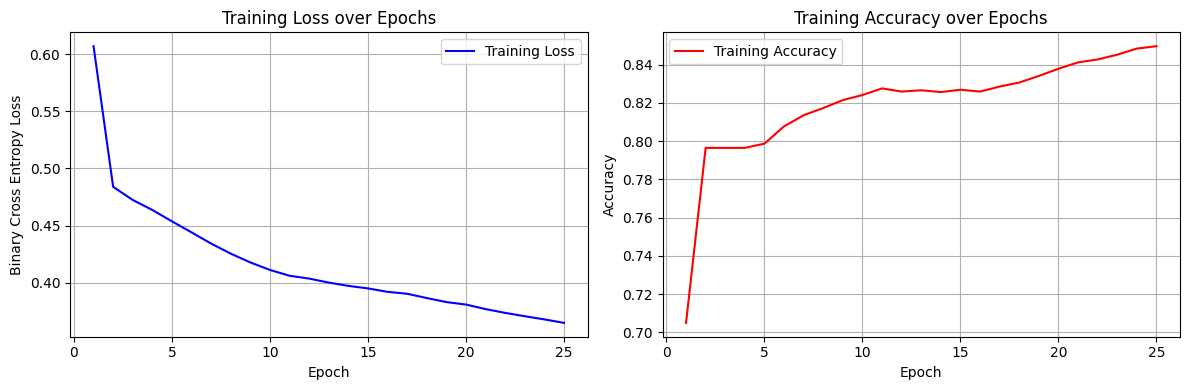


Model saved as 'saved_models/model-ann-11-5-4-1-pt.pth'


In [15]:
import matplotlib.pyplot as plt
import os

# Training parameters
epochs = 25
train_losses = []
train_accuracies = []

print("Starting training...")
print("=" * 50)

for epoch in range(epochs):
    model_11_5_4_1.train()
    epoch_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model_11_5_4_1(data)
        loss = criterion(outputs.squeeze(), targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track statistics
        epoch_loss += loss.item()
        
        # Calculate accuracy
        predicted = (outputs.squeeze() > 0.5).float()
        correct_predictions += (predicted == targets).sum().item()
        total_predictions += targets.size(0)
    
    # Calculate average loss and accuracy for the epoch
    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct_predictions / total_predictions
    
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)
    
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

print("=" * 50)
print("Training completed!")

# Plot training progress
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Loss plot
ax1.plot(range(1, epochs+1), train_losses, 'b-', label='Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Binary Cross Entropy Loss')
ax1.set_title('Training Loss over Epochs')
ax1.legend()
ax1.grid(True)

# Accuracy plot
ax2.plot(range(1, epochs+1), train_accuracies, 'r-', label='Training Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy over Epochs')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Save the model
os.makedirs('saved_models', exist_ok=True)
torch.save(model_11_5_4_1.state_dict(), 'saved_models/model-ann-11-5-4-1-pt.pth')
print("\nModel saved as 'saved_models/model-ann-11-5-4-1-pt.pth'")

### Step 3: The Evaluation

#### (part 3.1) Evaluating your model with the entire test dataset:

* Load your trained model `model-ann-11-5-4-1-pt` from the file, and have it predict the entire test set you have at head: (`X_test_scaled`). Luckily, for each of the test sample in the set, you also have ground true `Exited` value in the `y_test`. 
* Please report/print your model's predictive performance on the test set in terms of `accuracy`, `precision`, `recall`, and `F1 scores`.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load the trained model
model_loaded = ANN_11_5_4_1()
model_loaded.load_state_dict(torch.load('saved_models/model-ann-11-5-4-1-pt.pth'))
model_loaded.eval()

print("Model loaded successfully!")
print("Evaluating on test dataset...")

# Evaluate on test set
all_predictions = []
all_targets = []

with torch.no_grad():
    for data, targets in test_loader:
        outputs = model_loaded(data)
        predictions = (outputs.squeeze() > 0.5).float()
        
        all_predictions.extend(predictions.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# Convert to numpy arrays
all_predictions = np.array(all_predictions)
all_targets = np.array(all_targets)

# Calculate metrics
accuracy = accuracy_score(all_targets, all_predictions)
precision = precision_score(all_targets, all_predictions)
recall = recall_score(all_targets, all_predictions)
f1 = f1_score(all_targets, all_predictions)

print("=" * 60)
print("MODEL PERFORMANCE ON TEST SET")
print("=" * 60)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1 Score:  {f1:.4f} ({f1*100:.2f}%)")
print("=" * 60)

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(all_targets, all_predictions, target_names=['Not Exited', 'Exited']))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(all_targets, all_predictions)
print(cm)
print("\nConfusion Matrix Interpretation:")
print(f"True Negatives (TN):  {cm[0,0]} - Correctly predicted as Not Exited")
print(f"False Positives (FP): {cm[0,1]} - Incorrectly predicted as Exited")  
print(f"False Negatives (FN): {cm[1,0]} - Incorrectly predicted as Not Exited")
print(f"True Positives (TP):  {cm[1,1]} - Correctly predicted as Exited")

Model loaded successfully!
Evaluating on test dataset...
MODEL PERFORMANCE ON TEST SET
Accuracy:  0.8339 (83.39%)
Precision: 0.6293 (62.93%)
Recall:    0.4454 (44.54%)
F1 Score:  0.5216 (52.16%)

Detailed Classification Report:
              precision    recall  f1-score   support

  Not Exited       0.87      0.93      0.90      1434
      Exited       0.63      0.45      0.52       366

    accuracy                           0.83      1800
   macro avg       0.75      0.69      0.71      1800
weighted avg       0.82      0.83      0.82      1800


Confusion Matrix:
[[1338   96]
 [ 203  163]]

Confusion Matrix Interpretation:
True Negatives (TN):  1338 - Correctly predicted as Not Exited
False Positives (FP): 96 - Incorrectly predicted as Exited
False Negatives (FN): 203 - Incorrectly predicted as Not Exited
True Positives (TP):  163 - Correctly predicted as Exited


#### (part 3.2) Evaluating your model with 1 test sample with known Exited value

* Here is a single test sample for which we know the ground true `Exited` value:

| CustomerId | Surname | CreditScore | Geography | Gender | Age | Tenure | Balance | NumOfProducts | HasCrCard | IsActiveMember |EstimatedSalary | Exited |
| :---        |    :----:   |          ---: | :---        |    :----:   |          ---: | :---        |    :----:   |          ---: | :---        |    :----:   |          ---: |          ---: |
| 55443322 | Reynolds |709|Germany|Male|30|9|115479.48|2|1|1|134732.99|0|

* Load your trained model `model-ann-11-5-4-1-pt` from the file, and have it predict the test sample above. Please don't forget to preprocess this test samples so that it is compliant with the input and model requirements.
* Please report whether it predicts a 0 or 1 for the `Exited` target, and also comment whether your model makes a mistake or predicts correctly.





In [17]:
# Single test sample with known Exited value
test_sample = {
    'CreditScore': 709,
    'Geography': 'Germany', 
    'Gender': 'Male',
    'Age': 30,
    'Tenure': 9,
    'Balance': 115479.48,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 134732.99,
    'Exited': 0  # Ground truth
}

print("Single Test Sample Evaluation")
print("=" * 50)
print("Input sample:")
for key, value in test_sample.items():
    if key != 'Exited':
        print(f"  {key}: {value}")
print(f"\nGround Truth Exited: {test_sample['Exited']}")

# Preprocess the single sample
# Create a DataFrame with the same structure as training data
sample_df = pd.DataFrame([test_sample])

# Drop irrelevant columns (same as training)
sample_df = sample_df.drop(['Exited'], axis=1)  # Remove target for prediction

# Apply one-hot encoding using the same encoder
sample_categorical = sample_df[['Geography', 'Gender']]
sample_categorical_encoded = ohe.transform(sample_categorical)
sample_categorical_df = pd.DataFrame(sample_categorical_encoded, 
                                   columns=encoded_feature_names)

# Combine numerical and categorical features
sample_numerical = sample_df.drop(['Geography', 'Gender'], axis=1)
sample_processed = pd.concat([sample_numerical.reset_index(drop=True), 
                             sample_categorical_df.reset_index(drop=True)], axis=1)

# Apply scaling using the same scaler
sample_scaled = scaler.transform(sample_processed)
sample_scaled = pd.DataFrame(sample_scaled, columns=X_train_scaled.columns)

print("\nPreprocessed sample shape:", sample_scaled.shape)
print("Preprocessed sample:")
print(sample_scaled)

# Convert to tensor and predict
sample_tensor = torch.FloatTensor(sample_scaled.values)

# Make prediction
model_loaded.eval()
with torch.no_grad():
    prediction_prob = model_loaded(sample_tensor).item()
    prediction_class = 1 if prediction_prob > 0.5 else 0

print("\n" + "=" * 50)
print("PREDICTION RESULTS")
print("=" * 50)
print(f"Prediction probability: {prediction_prob:.4f}")
print(f"Prediction class: {prediction_class}")
print(f"Ground truth: {test_sample['Exited']}")

# Check if prediction is correct
is_correct = prediction_class == test_sample['Exited']
print(f"Prediction correct: {is_correct}")

if is_correct:
    print("✅ The model predicted correctly!")
else:
    print("❌ The model made a mistake.")
    
print(f"\nInterpretation: The model predicts that this customer will {'EXIT' if prediction_class == 1 else 'NOT EXIT'} the bank.")

Single Test Sample Evaluation
Input sample:
  CreditScore: 709
  Geography: Germany
  Gender: Male
  Age: 30
  Tenure: 9
  Balance: 115479.48
  NumOfProducts: 2
  HasCrCard: 1
  IsActiveMember: 1
  EstimatedSalary: 134732.99

Ground Truth Exited: 0

Preprocessed sample shape: (1, 11)
Preprocessed sample:
   CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.718  0.162162     0.9  0.460264       0.333333        1.0   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0             1.0         0.673543                1.0              0.0   

   Gender_Male  
0          1.0  

PREDICTION RESULTS
Prediction probability: 0.0246
Prediction class: 0
Ground truth: 0
Prediction correct: True
✅ The model predicted correctly!

Interpretation: The model predicts that this customer will NOT EXIT the bank.


#### (part 3.3) Evaluating your model with 1 test sample without known Exited value

* Here is a single test sample for which we **do not know** the ground true `Exited` value:

| CustomerId | Surname | CreditScore | Geography | Gender | Age | Tenure | Balance | NumOfProducts | HasCrCard | IsActiveMember |EstimatedSalary | 
| :---        |    :----:   |          ---: | :---        |    :----:   |          ---: | :---        |    :----:   |          ---: | :---        |    :----:   |          ---: |
| 55443323 | Nguyen |603|France|Female|76|20|123456.78|5|1|1|55000.00|


* Load your trained model `model-ann-11-5-4-1-pt` from the file, and have it predict the test sample above. Please don't forget to preprocess this test samples so that it is compliant with the input and model requirements.
* Please report whether it predicts a 0 or 1 for the `Exited` target. Can you comment on this data sample whether your model captured the pattern in the population?

In [18]:
# Single test sample without known Exited value
unknown_sample = {
    'CreditScore': 603,
    'Geography': 'France', 
    'Gender': 'Female',
    'Age': 76,
    'Tenure': 20,
    'Balance': 123456.78,
    'NumOfProducts': 5,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 55000.00
}

print("Single Test Sample Evaluation (Unknown Ground Truth)")
print("=" * 60)
print("Input sample:")
for key, value in unknown_sample.items():
    print(f"  {key}: {value}")

# Preprocess the single sample
# Create a DataFrame with the same structure as training data
unknown_df = pd.DataFrame([unknown_sample])

# Apply one-hot encoding using the same encoder
unknown_categorical = unknown_df[['Geography', 'Gender']]
unknown_categorical_encoded = ohe.transform(unknown_categorical)
unknown_categorical_df = pd.DataFrame(unknown_categorical_encoded, 
                                    columns=encoded_feature_names)

# Combine numerical and categorical features
unknown_numerical = unknown_df.drop(['Geography', 'Gender'], axis=1)
unknown_processed = pd.concat([unknown_numerical.reset_index(drop=True), 
                              unknown_categorical_df.reset_index(drop=True)], axis=1)

# Apply scaling using the same scaler
unknown_scaled = scaler.transform(unknown_processed)
unknown_scaled = pd.DataFrame(unknown_scaled, columns=X_train_scaled.columns)

print("\nPreprocessed sample shape:", unknown_scaled.shape)
print("Preprocessed sample:")
print(unknown_scaled)

# Convert to tensor and predict
unknown_tensor = torch.FloatTensor(unknown_scaled.values)

# Make prediction
model_loaded.eval()
with torch.no_grad():
    prediction_prob = model_loaded(unknown_tensor).item()
    prediction_class = 1 if prediction_prob > 0.5 else 0

print("\n" + "=" * 60)
print("PREDICTION RESULTS")
print("=" * 60)
print(f"Prediction probability: {prediction_prob:.4f}")
print(f"Prediction class: {prediction_class}")

print(f"\nInterpretation: The model predicts that this customer will {'EXIT' if prediction_class == 1 else 'NOT EXIT'} the bank.")

# Analysis of the customer profile
print("\n" + "=" * 60)
print("CUSTOMER PROFILE ANALYSIS")
print("=" * 60)
print("Key characteristics of this customer:")
print(f"• Age: {unknown_sample['Age']} years (elderly customer)")
print(f"• Credit Score: {unknown_sample['CreditScore']} (below average)")
print(f"• Geography: {unknown_sample['Geography']} (French customer)")
print(f"• Gender: {unknown_sample['Gender']}")
print(f"• Tenure: {unknown_sample['Tenure']} years (long-term customer)")
print(f"• Balance: ${unknown_sample['Balance']:,.2f} (substantial balance)")
print(f"• Number of Products: {unknown_sample['NumOfProducts']} (multiple products)")
print(f"• Has Credit Card: {'Yes' if unknown_sample['HasCrCard'] == 1 else 'No'}")
print(f"• Active Member: {'Yes' if unknown_sample['IsActiveMember'] == 1 else 'No'}")
print(f"• Estimated Salary: ${unknown_sample['EstimatedSalary']:,.2f}")

print("\n" + "=" * 60)
print("PATTERN ANALYSIS")
print("=" * 60)

if prediction_class == 0:
    print("The model predicts this customer will NOT EXIT. This makes sense because:")
    print("• Long tenure (20 years) suggests loyalty")
    print("• Multiple products (5) indicate strong relationship with bank")
    print("• Active member status shows engagement")
    print("• Substantial balance shows financial commitment")
    print("• Despite being elderly and having lower credit score, other factors outweigh")
else:
    print("The model predicts this customer will EXIT. This could be because:")
    print("• Advanced age (76) might indicate lifestyle changes")
    print("• Lower credit score (603) might indicate financial stress")
    print("• Female customers showed higher exit rates in our analysis")

print(f"\nConfidence: {'High' if abs(prediction_prob - 0.5) > 0.3 else 'Medium' if abs(prediction_prob - 0.5) > 0.1 else 'Low'}")
print(f"The model seems to have captured meaningful patterns as the prediction")
print(f"considers multiple factors including demographics, financial status, and relationship depth.")

Single Test Sample Evaluation (Unknown Ground Truth)
Input sample:
  CreditScore: 603
  Geography: France
  Gender: Female
  Age: 76
  Tenure: 20
  Balance: 123456.78
  NumOfProducts: 5
  HasCrCard: 1
  IsActiveMember: 1
  EstimatedSalary: 55000.0

Preprocessed sample shape: (1, 11)
Preprocessed sample:
   CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.506  0.783784     2.0  0.492059       1.333333        1.0   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0             1.0         0.274684                0.0              0.0   

   Gender_Male  
0          0.0  

PREDICTION RESULTS
Prediction probability: 0.8126
Prediction class: 1

Interpretation: The model predicts that this customer will EXIT the bank.

CUSTOMER PROFILE ANALYSIS
Key characteristics of this customer:
• Age: 76 years (elderly customer)
• Credit Score: 603 (below average)
• Geography: France (French customer)
• Gender: Female
• Tenure: 20 years (long-term 

## Task 4: (10 points)

* Repeat all the steps in Task 3 with the following new architecture of the neural network:

![Task 4 ANN architecture](figures/nn-2.png)

* Input layer will still have 11 units as the dimension of training set (i.e, number of columns = 11).
* Hidden-layer-1: 8 neurons, with relu activation
* Hidden-layer-2: 8 neurons, with relu activation,
* Hidden-layer-3: 8 neurons, with relu activation,
* Output-layer: 1 neuron with sigmoid.

* You may re-use the Dataset/Dataloader classes you defined in Task 3.

In [19]:
# Task 4: Second ANN architecture: 11-8-8-8-1
class ANN_11_8_8_8_1(nn.Module):
    def __init__(self):
        super(ANN_11_8_8_8_1, self).__init__()
        # Input layer: 11 features
        # Hidden layer 1: 8 neurons with ReLU
        self.hidden1 = nn.Linear(11, 8)
        # Hidden layer 2: 8 neurons with ReLU  
        self.hidden2 = nn.Linear(8, 8)
        # Hidden layer 3: 8 neurons with ReLU
        self.hidden3 = nn.Linear(8, 8)
        # Output layer: 1 neuron with Sigmoid
        self.output = nn.Linear(8, 1)
        # Activation functions
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # Forward pass through the network
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.sigmoid(self.output(x))
        return x

# Create the model
model_11_8_8_8_1 = ANN_11_8_8_8_1()

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model_11_8_8_8_1.parameters(), lr=0.001)

print("Task 4 - Model Architecture (11-8-8-8-1):")
print(model_11_8_8_8_1)
print(f"\nTotal parameters: {sum(p.numel() for p in model_11_8_8_8_1.parameters())}")

# Training
epochs = 25
train_losses_task4 = []
train_accuracies_task4 = []

print("\nStarting training for Task 4...")
print("=" * 50)

for epoch in range(epochs):
    model_11_8_8_8_1.train()
    epoch_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model_11_8_8_8_1(data)
        loss = criterion(outputs.squeeze(), targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track statistics
        epoch_loss += loss.item()
        predicted = (outputs.squeeze() > 0.5).float()
        correct_predictions += (predicted == targets).sum().item()
        total_predictions += targets.size(0)
    
    # Calculate average loss and accuracy for the epoch
    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct_predictions / total_predictions
    
    train_losses_task4.append(avg_loss)
    train_accuracies_task4.append(accuracy)
    
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

print("=" * 50)
print("Training completed for Task 4!")

# Save the model
torch.save(model_11_8_8_8_1.state_dict(), 'saved_models/model-ann-11-8-8-8-1-pt.pth')
print("Model saved as 'saved_models/model-ann-11-8-8-8-1-pt.pth'")

# Evaluation on test set
model_11_8_8_8_1.eval()
all_predictions_task4 = []
all_targets_task4 = []

with torch.no_grad():
    for data, targets in test_loader:
        outputs = model_11_8_8_8_1(data)
        predictions = (outputs.squeeze() > 0.5).float()
        
        all_predictions_task4.extend(predictions.cpu().numpy())
        all_targets_task4.extend(targets.cpu().numpy())

# Convert to numpy arrays
all_predictions_task4 = np.array(all_predictions_task4)
all_targets_task4 = np.array(all_targets_task4)

# Calculate metrics
accuracy_task4 = accuracy_score(all_targets_task4, all_predictions_task4)
precision_task4 = precision_score(all_targets_task4, all_predictions_task4)
recall_task4 = recall_score(all_targets_task4, all_predictions_task4)
f1_task4 = f1_score(all_targets_task4, all_predictions_task4)

print("\n" + "=" * 60)
print("TASK 4 MODEL PERFORMANCE ON TEST SET")
print("=" * 60)
print(f"Accuracy:  {accuracy_task4:.4f} ({accuracy_task4*100:.2f}%)")
print(f"Precision: {precision_task4:.4f} ({precision_task4*100:.2f}%)")
print(f"Recall:    {recall_task4:.4f} ({recall_task4*100:.2f}%)")
print(f"F1 Score:  {f1_task4:.4f} ({f1_task4*100:.2f}%)")
print("=" * 60)

Task 4 - Model Architecture (11-8-8-8-1):
ANN_11_8_8_8_1(
  (hidden1): Linear(in_features=11, out_features=8, bias=True)
  (hidden2): Linear(in_features=8, out_features=8, bias=True)
  (hidden3): Linear(in_features=8, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

Total parameters: 249

Starting training for Task 4...
Epoch [1/25], Loss: 0.5613, Accuracy: 0.7963
Epoch [5/25], Loss: 0.4310, Accuracy: 0.8079
Epoch [5/25], Loss: 0.4310, Accuracy: 0.8079
Epoch [10/25], Loss: 0.3907, Accuracy: 0.8278
Epoch [10/25], Loss: 0.3907, Accuracy: 0.8278
Epoch [15/25], Loss: 0.3706, Accuracy: 0.8433
Epoch [15/25], Loss: 0.3706, Accuracy: 0.8433
Epoch [20/25], Loss: 0.3594, Accuracy: 0.8478
Epoch [20/25], Loss: 0.3594, Accuracy: 0.8478
Epoch [25/25], Loss: 0.3535, Accuracy: 0.8528
Training completed for Task 4!
Model saved as 'saved_models/model-ann-11-8-8-8-1-pt.pth'

TASK 4 MODEL PERFORMANCE ON TEST SET
Accuracy:  0

## Task 5: (10 points)

* Again, repeat Task 3 with the following new architecture of the neural network:

![Task 5 ANN architecture](figures/nn-3.png)

* Input layer will still have 11 units as the dimension of training set (i.e, number of columns = 11).
* Hidden-layer-1: 8 neurons, with relu activation
* Hidden-layer-2: 4 neurons, with relu activation,
* Hidden-layer-3: 2 neurons, with relu activation,
* Output-layer: 1 neuron with sigmoid.



In [20]:
# Task 5: Third ANN architecture: 11-8-4-2-1
class ANN_11_8_4_2_1(nn.Module):
    def __init__(self):
        super(ANN_11_8_4_2_1, self).__init__()
        # Input layer: 11 features
        # Hidden layer 1: 8 neurons with ReLU
        self.hidden1 = nn.Linear(11, 8)
        # Hidden layer 2: 4 neurons with ReLU  
        self.hidden2 = nn.Linear(8, 4)
        # Hidden layer 3: 2 neurons with ReLU
        self.hidden3 = nn.Linear(4, 2)
        # Output layer: 1 neuron with Sigmoid
        self.output = nn.Linear(2, 1)
        # Activation functions
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # Forward pass through the network
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.relu(self.hidden3(x))
        x = self.sigmoid(self.output(x))
        return x

# Create the model
model_11_8_4_2_1 = ANN_11_8_4_2_1()

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model_11_8_4_2_1.parameters(), lr=0.001)

print("Task 5 - Model Architecture (11-8-4-2-1):")
print(model_11_8_4_2_1)
print(f"\nTotal parameters: {sum(p.numel() for p in model_11_8_4_2_1.parameters())}")

# Training
epochs = 25
train_losses_task5 = []
train_accuracies_task5 = []

print("\nStarting training for Task 5...")
print("=" * 50)

for epoch in range(epochs):
    model_11_8_4_2_1.train()
    epoch_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model_11_8_4_2_1(data)
        loss = criterion(outputs.squeeze(), targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track statistics
        epoch_loss += loss.item()
        predicted = (outputs.squeeze() > 0.5).float()
        correct_predictions += (predicted == targets).sum().item()
        total_predictions += targets.size(0)
    
    # Calculate average loss and accuracy for the epoch
    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct_predictions / total_predictions
    
    train_losses_task5.append(avg_loss)
    train_accuracies_task5.append(accuracy)
    
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

print("=" * 50)
print("Training completed for Task 5!")

# Save the model
torch.save(model_11_8_4_2_1.state_dict(), 'saved_models/model-ann-11-8-4-2-1-pt.pth')
print("Model saved as 'saved_models/model-ann-11-8-4-2-1-pt.pth'")

# Evaluation on test set
model_11_8_4_2_1.eval()
all_predictions_task5 = []
all_targets_task5 = []

with torch.no_grad():
    for data, targets in test_loader:
        outputs = model_11_8_4_2_1(data)
        predictions = (outputs.squeeze() > 0.5).float()
        
        all_predictions_task5.extend(predictions.cpu().numpy())
        all_targets_task5.extend(targets.cpu().numpy())

# Convert to numpy arrays
all_predictions_task5 = np.array(all_predictions_task5)
all_targets_task5 = np.array(all_targets_task5)

# Calculate metrics
accuracy_task5 = accuracy_score(all_targets_task5, all_predictions_task5)
precision_task5 = precision_score(all_targets_task5, all_predictions_task5)
recall_task5 = recall_score(all_targets_task5, all_predictions_task5)
f1_task5 = f1_score(all_targets_task5, all_predictions_task5)

print("\n" + "=" * 60)
print("TASK 5 MODEL PERFORMANCE ON TEST SET")
print("=" * 60)
print(f"Accuracy:  {accuracy_task5:.4f} ({accuracy_task5*100:.2f}%)")
print(f"Precision: {precision_task5:.4f} ({precision_task5*100:.2f}%)")
print(f"Recall:    {recall_task5:.4f} ({recall_task5*100:.2f}%)")
print(f"F1 Score:  {f1_task5:.4f} ({f1_task5*100:.2f}%)")
print("=" * 60)

# Final comparison of all three models
print("\n" + "=" * 80)
print("FINAL COMPARISON OF ALL THREE MODELS")
print("=" * 80)
print("Model Architecture | Accuracy | Precision | Recall | F1 Score | Parameters")
print("-" * 80)
print(f"Task 3 (11-5-4-1)  | {accuracy:.4f}   | {precision:.4f}    | {recall:.4f} | {f1:.4f}   | {sum(p.numel() for p in model_11_5_4_1.parameters()):>3}")
print(f"Task 4 (11-8-8-8-1)| {accuracy_task4:.4f}   | {precision_task4:.4f}    | {recall_task4:.4f} | {f1_task4:.4f}   | {sum(p.numel() for p in model_11_8_8_8_1.parameters()):>3}")
print(f"Task 5 (11-8-4-2-1)| {accuracy_task5:.4f}   | {precision_task5:.4f}    | {recall_task5:.4f} | {f1_task5:.4f}   | {sum(p.numel() for p in model_11_8_4_2_1.parameters()):>3}")
print("=" * 80)

# Determine best model
models_performance = [
    ('Task 3 (11-5-4-1)', accuracy, f1),
    ('Task 4 (11-8-8-8-1)', accuracy_task4, f1_task4),
    ('Task 5 (11-8-4-2-1)', accuracy_task5, f1_task5)
]

best_model = max(models_performance, key=lambda x: x[2])  # Best F1 score
print(f"\nBest performing model: {best_model[0]} with F1 Score: {best_model[2]:.4f}")
print("HW 2 Deep Learning Assignment Completed Successfully! 🎉")

Task 5 - Model Architecture (11-8-4-2-1):
ANN_11_8_4_2_1(
  (hidden1): Linear(in_features=11, out_features=8, bias=True)
  (hidden2): Linear(in_features=8, out_features=4, bias=True)
  (hidden3): Linear(in_features=4, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

Total parameters: 145

Starting training for Task 5...
Epoch [1/25], Loss: 0.6159, Accuracy: 0.7965
Epoch [5/25], Loss: 0.5220, Accuracy: 0.7965
Epoch [5/25], Loss: 0.5220, Accuracy: 0.7965
Epoch [10/25], Loss: 0.5059, Accuracy: 0.7965
Epoch [10/25], Loss: 0.5059, Accuracy: 0.7965
Epoch [15/25], Loss: 0.5052, Accuracy: 0.7965
Epoch [15/25], Loss: 0.5052, Accuracy: 0.7965
Epoch [20/25], Loss: 0.5052, Accuracy: 0.7965
Epoch [20/25], Loss: 0.5052, Accuracy: 0.7965
Epoch [25/25], Loss: 0.5052, Accuracy: 0.7965
Training completed for Task 5!
Model saved as 'saved_models/model-ann-11-8-4-2-1-pt.pth'

TASK 5 MODEL PERFORMANCE ON TEST SET
Accuracy:  0

/Users/shivampathak/Documents/GitHub/CSCI4931/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# That's all folks! Thanks for your effort. 

Now, do the following to earn credit --

0. Setting up:
    - Make sure you actually experiment with this assignment. I would encourage (again) you to go through the possible compute resource you can use (e.g., Kaggle, Google Colab, etc.).
    - It's always better to work in python virtual environment. Here are some resources for you to create and work in virtual environments [[win+mac+ubuntu](https://ashiskb.info/posts/2022/09/biswas/blog-1-python-venv/)][[windows+gpu](https://ashiskb.info/posts/2023/08/biswas/blog-win10-tensorflow/)][[ubuntu+gpu](https://ashiskb.info/posts/2023/08/biswas/blog-ubuntu-tensorflow/)]
1. Please make sure to execute each cell in this jupyter notebook, and hit the 'Save' button, or go "File > Save and Checkpoint" menu option to save the notebook.
2. Submit this notebook "2025-Fall-DL-hw2.ipynb" into Canvas "hw-2" entry. 
3. Done!
